In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()


In [2]:
# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Create age bins for better visualization
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])


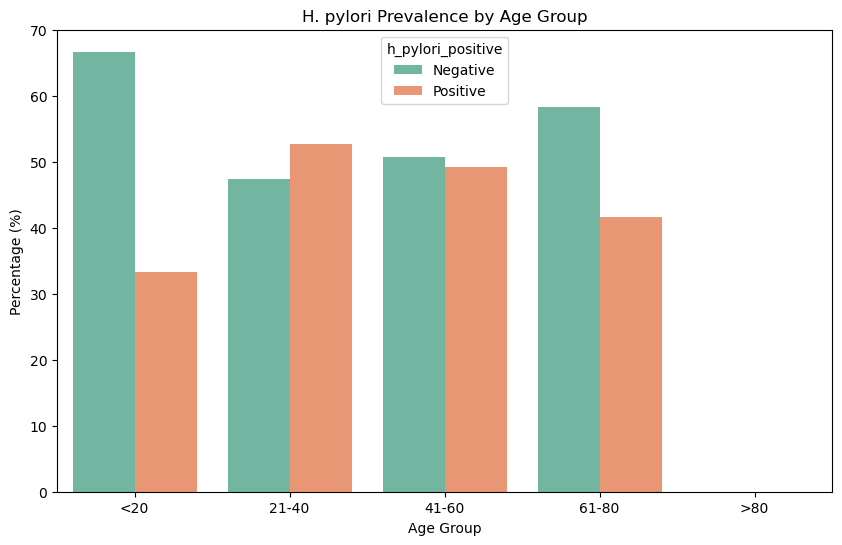

KeyError: 'job_encoded'

In [4]:

# Function to plot percentages
def plot_percentage(df, column, hue, title, xlabel, ylabel, palette):
    percentage_data = df.groupby([column, hue]).size().reset_index(name='count')
    percentage_data['percentage'] = percentage_data.groupby(column)['count'].transform(lambda x: x / x.sum() * 100)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=percentage_data, x=column, y='percentage', hue=hue, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.show()

# H. pylori prevalence by age group
plot_percentage(df, 'age_group', 'h_pylori_positive', 'H. pylori Prevalence by Age Group', 'Age Group', 'Percentage (%)', 'Set2')

# H. pylori prevalence by job category
plot_percentage(df, 'job_encoded', 'h_pylori_positive', 'H. pylori Prevalence by Job Category', 'Job Encoded', 'Percentage (%)', 'Set2')

# H. pylori prevalence by sex
plot_percentage(df, 'sex', 'h_pylori_positive', 'H. pylori Prevalence by Sex', 'Sex', 'Percentage (%)', 'Set1')

# Clinical symptoms prevalence
symptoms = ['epigastric pain ', 'fullness', ' bloating', 'reflux', 'halitosis', ' nausea', 
            'vomit', ' diarrhea', ' constipation', 'Hematochezia', 'loss of appetite', 
            'weight loss', 'nightly perspirant', 'Gastrointestinal bleeding', 'malignant stomach', 
            'stomach ulcer']

for symptom in symptoms:
    plot_percentage(df, symptom.strip(), 'h_pylori_positive', f'H. pylori Prevalence by {symptom.strip()}', 
                    f'{symptom.strip()} (1 = Present / 0 = Absent)', 'Percentage (%)', 'Set1')

# Risk factors prevalence
risk_factors = ['weight loss', 'loss of appetite', 'Hematochezia', 'nightly perspirant']

for factor in risk_factors:
    plot_percentage(df, factor.strip(), 'h_pylori_positive', f'H. pylori Prevalence by {factor.strip()}', 
                    f'{factor.strip()} (1 = Present / 0 = Absent)', 'Percentage (%)', 'Set2')

# Underlying conditions prevalence
underlying_conditions = ['Gastrointestinal bleeding', 'malignant stomach', 'stomach ulcer']

for condition in underlying_conditions:
    plot_percentage(df, condition.strip(), 'h_pylori_positive', f'H. pylori Prevalence by {condition.strip()}', 
                    f'{condition.strip()} (1 = Present / 0 = Absent)', 'Percentage (%)', 'Set3')

# Family history prevalence
family_history_conditions = ['malignant stomach fam hist', 'Gastrointestinal bleeding fam hist']

for condition in family_history_conditions:
    plot_percentage(df, condition.strip(), 'h_pylori_positive', f'H. pylori Prevalence by Family History of {condition.strip()}', 
                    f'{condition.strip()} (1 = Present / 0 = Absent)', 'Percentage (%)', 'Set2')

# Smoking habits
plot_percentage(df, 'smoker', 'h_pylori_positive', 'H. pylori Prevalence by Smoking Habits', 'Smoker (1) / Non-Smoker (0)', 'Percentage (%)', 'Set1')

# Alcohol consumption
plot_percentage(df, 'alchohlic', 'h_pylori_positive', 'H. pylori Prevalence by Alcohol Consumption', 'Alcohol Consumer (1) / Non-Consumer (0)', 'Percentage (%)', 'Set2')

# PPI use
plot_percentage(df, ' ppi taking', 'h_pylori_positive', 'H. pylori Prevalence by PPI Use', 'PPI User (1) / Non-User (0)', 'Percentage (%)', 'Set3')

# NSAID use
plot_percentage(df, ' nsaid taking', 'h_pylori_positive', 'H. pylori Prevalence by NSAID Use', 'NSAID User (1) / Non-User (0)', 'Percentage (%)', 'Set2')

# Previous infection treatment and antibiotic use
plot_percentage(df, 'Treatment of previous infection and use of antibiotics', 'h_pylori_positive', 'H. pylori Prevalence by Previous Infection Treatment and Antibiotic Use', 'Treated with Antibiotics (1) / Not Treated (0)', 'Percentage (%)', 'Set1')

# Duration of dyspepsia symptoms
df['months'] = pd.to_numeric(df['months'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='h_pylori_positive', y='months', palette='Set2')
plt.title('H. pylori Prevalence by Duration of Dyspepsia Symptoms')
plt.xlabel('H. pylori Test Result')
plt.ylabel('Months (Duration of Symptoms)')
plt.show()